In [398]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pprint
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

np.random.seed(0)
tf.random.set_seed(0)

In [453]:
df = pd.read_csv('../../dataset_samples/daod_mc16_13TeV_sequences.csv')

In [454]:
df = df.reindex(np.random.permutation(df.index))

In [455]:
df['n_tasks'] = df['n_tasks'].apply(lambda x: [int(item) for item in x[1:-1].split(',')])

In [509]:
w_start, w_end = 230, 260

In [510]:
train_sequence = df['n_tasks'].apply(lambda x: [item for item in x][w_start:w_end])
train_labels = df['n_tasks'].apply(lambda x: [1 if item>0 else 0 for item in x][w_end])

In [511]:
sequences = np.array(list(train_sequence.values))
labels = np.array(list(train_labels.values))

In [512]:
new_sequences = []
new_labels = []
for idx,sequence in enumerate(sequences):
    number_of_accesses = sum(sequence)
    # skip not popular datasets
    if number_of_accesses > 10:
        new_sequences.append(sequence)
        new_labels.append(labels[idx])

In [513]:
new_sequences = np.array(new_sequences)

In [514]:
print(new_sequences)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [515]:
new_sequences.shape

(3469, 30)

In [516]:
Y = np.array(new_labels)

In [517]:
n_features = 1
X = new_sequences.reshape((new_sequences.shape[0], new_sequences.shape[1], n_features))
print(X[:2])

[[[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 1]
  [14]
  [ 3]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]

 [[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 7]
  [10]
  [ 3]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]]


In [518]:
X.shape

(3469, 30, 1)

In [519]:
Ntest = 300
# Nval = 3000

Xtrain = X[:-Ntest]
Xtest = X[-Ntest:]
Ytrain = Y[:-Ntest]
Ytest = Y[-Ntest:]
# Xval = X[-Nval:]
# Yval = Y[-Nval:]


In [520]:
Ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [521]:
# optimal number of units
# n_units = Xtrain.shape[0]/(2*())

In [565]:
T = 30
D = 1
K = 2

In [566]:
i = Input(shape=(T,D))
x = LSTM(16, return_sequences=True)(i)
# x = LSTM(16, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)
model = Model(i, x)

In [567]:
# i = Input(shape=(30,1))
# x = LSTM(32, return_sequences=True)(i)
# x = GlobalMaxPooling1D()(x)
# x = Dense(2)(x)
# model = Model(i,x)

In [568]:
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 30, 1)]           0         
                                                                 
 lstm_32 (LSTM)              (None, 30, 16)            1152      
                                                                 
 global_max_pooling1d_22 (Gl  (None, 16)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_22 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,186
Trainable params: 1,186
Non-trainable params: 0
_________________________________________________________________


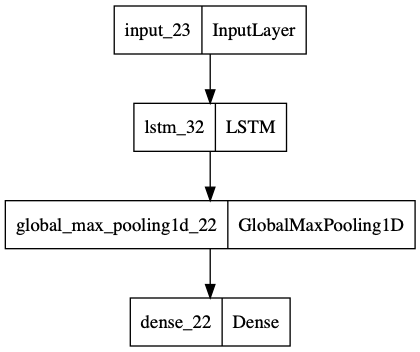

In [569]:
tf.keras.utils.plot_model(model)

In [570]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True
)

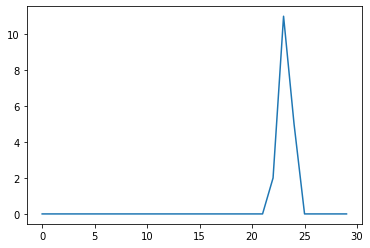

In [571]:
plt.plot(Xtrain[200, :, :]);

In [572]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)
# The from_logits=True attribute inform the loss function that the output values generated by the model are not normalized, a.k.a. logits. In other words, the softmax function has not been applied on them to produce a probability distribution. The softmax function would be automatically applied on the output values by the loss function. Therefore, this does not make a difference with the scenario when you use from_logits=False (default) and a softmax activation function on last layer; however, in some cases, this might help with numerical stability during training of the model.

In [573]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    callbacks=[check_point],
    validation_data=(Xtest, Ytest)
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 99/100 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7446WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fdb8debb7a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

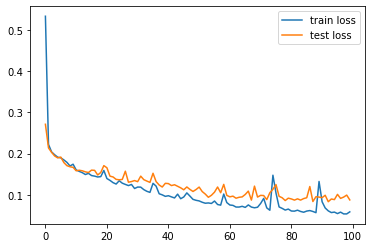

In [574]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

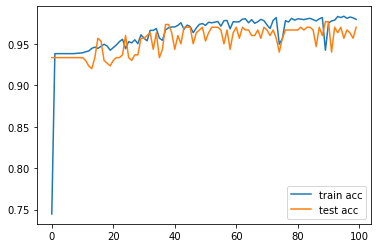

In [575]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [576]:
# load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [577]:
# make predictions
Ptest = best_model.predict(Xtest)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 [==============================] - 1s 7ms/step


In [578]:
Ptest

array([[ 2.8274326 , -2.4645026 ],
       [ 3.9758434 , -3.8159943 ],
       [ 3.7921515 , -3.4947076 ],
       [ 4.0171986 , -3.77947   ],
       [ 1.5209329 , -1.2220262 ],
       [ 4.157921  , -4.176018  ],
       [ 2.663326  , -2.1870039 ],
       [ 2.4442763 , -1.8722733 ],
       [-0.11508153,  1.0237468 ],
       [ 3.999929  , -3.6915994 ],
       [ 3.3798304 , -2.9209516 ],
       [ 3.0353236 , -2.3074574 ],
       [ 3.9975448 , -3.789453  ],
       [ 4.1697903 , -4.1890755 ],
       [ 3.5518336 , -3.2800467 ],
       [ 0.738989  , -0.5458985 ],
       [ 3.9897141 , -3.6777596 ],
       [-0.20142011,  1.1418043 ],
       [-0.70744336,  1.5453712 ],
       [ 3.9777136 , -3.7033482 ],
       [ 3.2159247 , -2.6527696 ],
       [ 4.005542  , -3.7389317 ],
       [ 3.9897141 , -3.6777596 ],
       [ 2.9693766 , -2.5356102 ],
       [ 3.7921515 , -3.4947076 ],
       [ 0.45791084, -0.3294431 ],
       [ 2.9754856 , -2.5643172 ],
       [ 3.5193834 , -3.117835  ],
       [ 3.2126656 ,

In [579]:
np.argmax(Ptest, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [580]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.97

In [581]:
Ytest

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [582]:
np.argmax(Ptest, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [583]:
# Print results:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f'Accuracy: {accuracy_score(Ytest, np.argmax(Ptest, axis=1))}')
print('Confusion Matrix')
print(confusion_matrix(Ytest, np.argmax(Ptest, axis=1)))
print('Classification Report')
print(classification_report(Ytest, np.argmax(Ptest, axis=1)))

Accuracy: 0.97
Confusion Matrix
[[275   5]
 [  4  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       280
           1       0.76      0.80      0.78        20

    accuracy                           0.97       300
   macro avg       0.87      0.89      0.88       300
weighted avg       0.97      0.97      0.97       300



In [584]:
w_start_eval, w_end_eval = 231, 261

In [585]:
df['eval_sequence'] = df['n_tasks'].apply(lambda x: [item for item in x][w_start_eval:w_end_eval])
df['eval_labels'] = df['n_tasks'].apply(lambda x: [1 if item>0 else 0 for item in x][w_end_eval])

In [586]:
eval_sequences = np.array(list(df['eval_sequence'].values))
eval_labels = np.array(list(df['eval_labels'].values))

In [594]:
new_eval_sequences = []
new_eval_labels = []
for idx,sequence in enumerate(eval_sequences):
    number_of_accesses = sum(sequence)
    # skip not popular datasets
    if number_of_accesses > 20:
        new_eval_sequences.append(sequence)
        new_eval_labels.append(eval_labels[idx])

In [595]:
new_eval_sequences = np.array(new_eval_sequences)
new_eval_sequences = new_eval_sequences.reshape((new_eval_sequences.shape[0], new_eval_sequences.shape[1], 1))

In [596]:
new_eval_sequences.shape

(640, 30, 1)

In [597]:
new_eval_labels = np.array(new_eval_labels)

In [598]:
pred_y_eval = best_model.predict(new_eval_sequences)

20/20 [==============================] - 0s 3ms/step


In [599]:
# evaluate
np.mean(np.argmax(pred_y_eval, axis=1) == new_eval_labels)

0.8484375

In [600]:
print(f'Accuracy: {accuracy_score(new_eval_labels, np.argmax(pred_y_eval, axis=1))}')
print('Confusion Matrix')
print(confusion_matrix(new_eval_labels, np.argmax(pred_y_eval, axis=1)))
print('Classification Report')
print(classification_report(new_eval_labels, np.argmax(pred_y_eval, axis=1)))

Accuracy: 0.8484375
Confusion Matrix
[[527  58]
 [ 39  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       585
           1       0.22      0.29      0.25        55

    accuracy                           0.85       640
   macro avg       0.57      0.60      0.58       640
weighted avg       0.87      0.85      0.86       640

